In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv') #imported the data
data.head() #viewing the data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
## Observations:
#1. Is a classification problem as the label is bianary'p' and 'e'.
#2. Dataset has categorical data and for model building has to convert it to ordinal data

In [5]:
data.columns #23 columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
data.shape

(8124, 23)

In [7]:
# we have 8124 rows and 23 columns

In [8]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
#About the columns

#count shows the number of responses.
#unique shows the number of unique categorical values.
#top shows the highest-occurring categorical value.
#freq shows the frequency/count of the highest-occurring categorical value.
#As example:-----
#1.Cap Shape: 6 unique shapes of mushroom, x shape being the highest with a frequency of 3656 occurance.
#2.Cap Surface: 4 unique surfaces with y being the most common surface with 3244 occurance
#3.Cap Color: 10 unique type of caps with n being the highest with 2284 occurances.
#4.Bruises:2 unique types of bruises with f type being the highest and 4748 occurances.
#5. Odor: 9 unique odors with n type being the highest and 3528 occurance.
#6. Gill-Attac: 2 unique type with f being the highest and 7914 occurances.
#7. Gill-Spacing: 2 unique spacing with c being the highest and 6182 occurance.................

## Specific Observation: Veil-type has only 1 unique type and the count and occurance value being same there is no uniqueness,
#                        hence will further see if this can be removed.

In [10]:
data.info()

# as the datatype is Object hence used data.info in place of data.isna as it commonly shows non object nulls.
# Observation shows no null value and the Dtype is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
#Changing D type from object
from sklearn.preprocessing import LabelEncoder

In [12]:
lab_enc =LabelEncoder()

In [13]:
for column in data.columns:
    data[column]=lab_enc.fit_transform(data[column])

In [14]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [16]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [17]:
# Checking how the data is distributed in every column

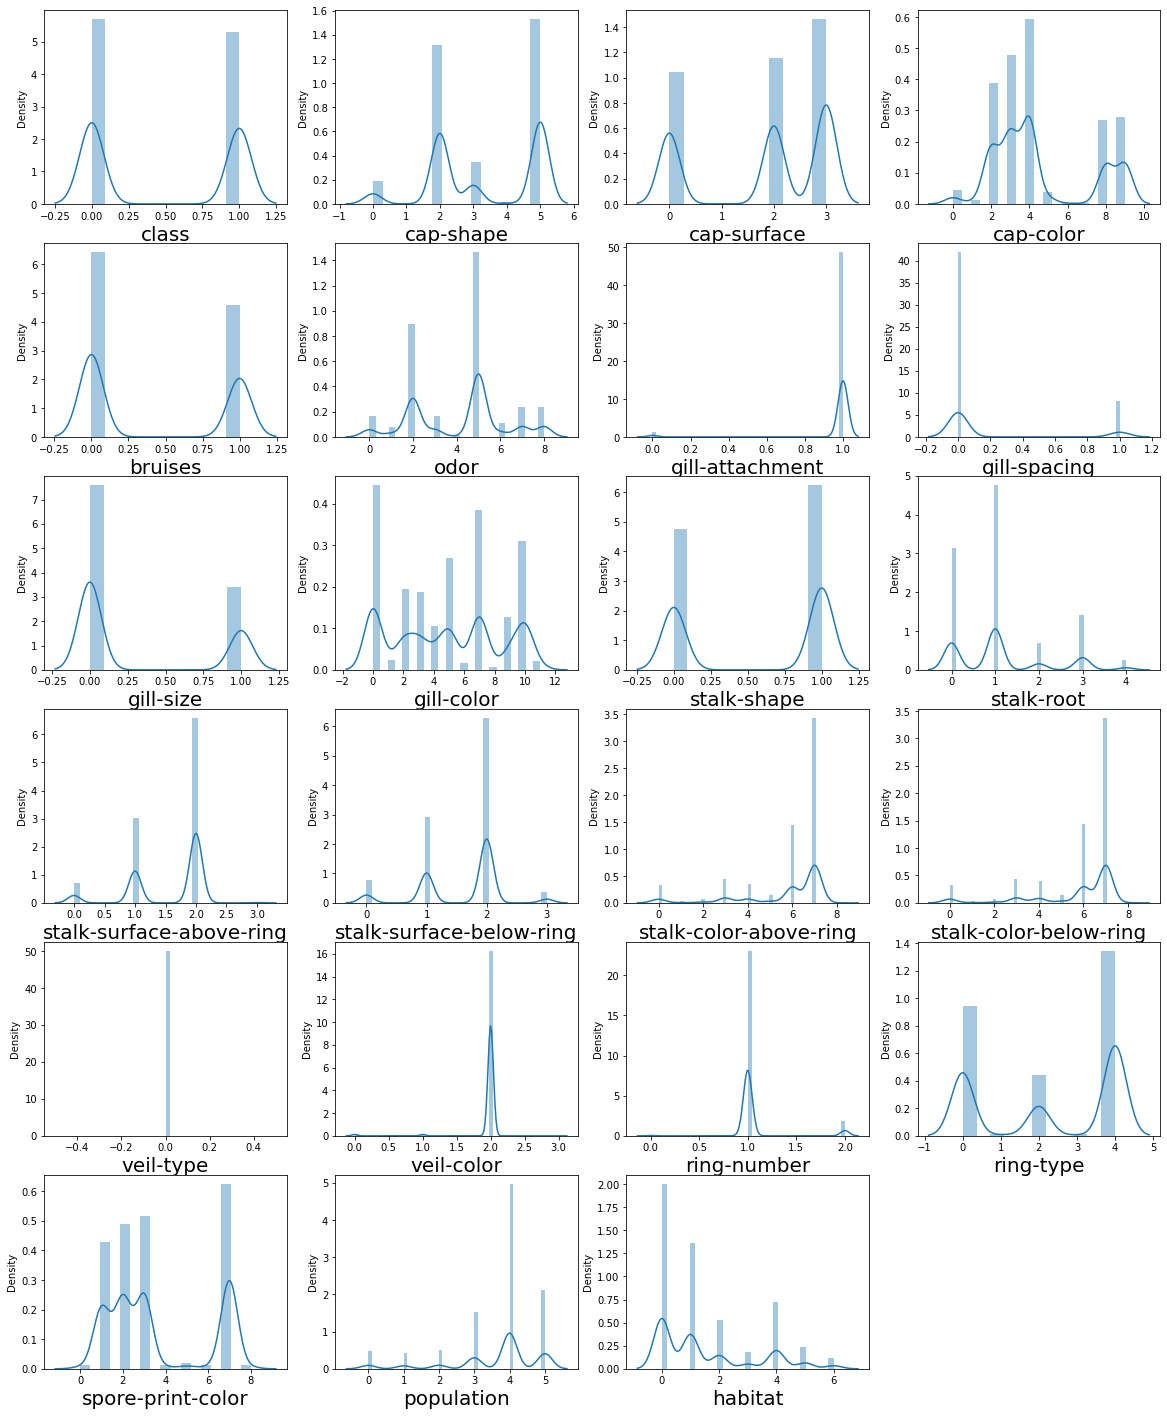

In [18]:
plt.figure(figsize = (20,25), facecolor ='white')
plotnumber = 1

for column in data:
    if plotnumber <=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [19]:
# Observation: Apart from the veil-type rest data is distributed in a range. 
# Data in the features are categorical hence does not show normal distribution

In [20]:
# Checking Skewness:
data.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [21]:
# Checking the corelation

In [22]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

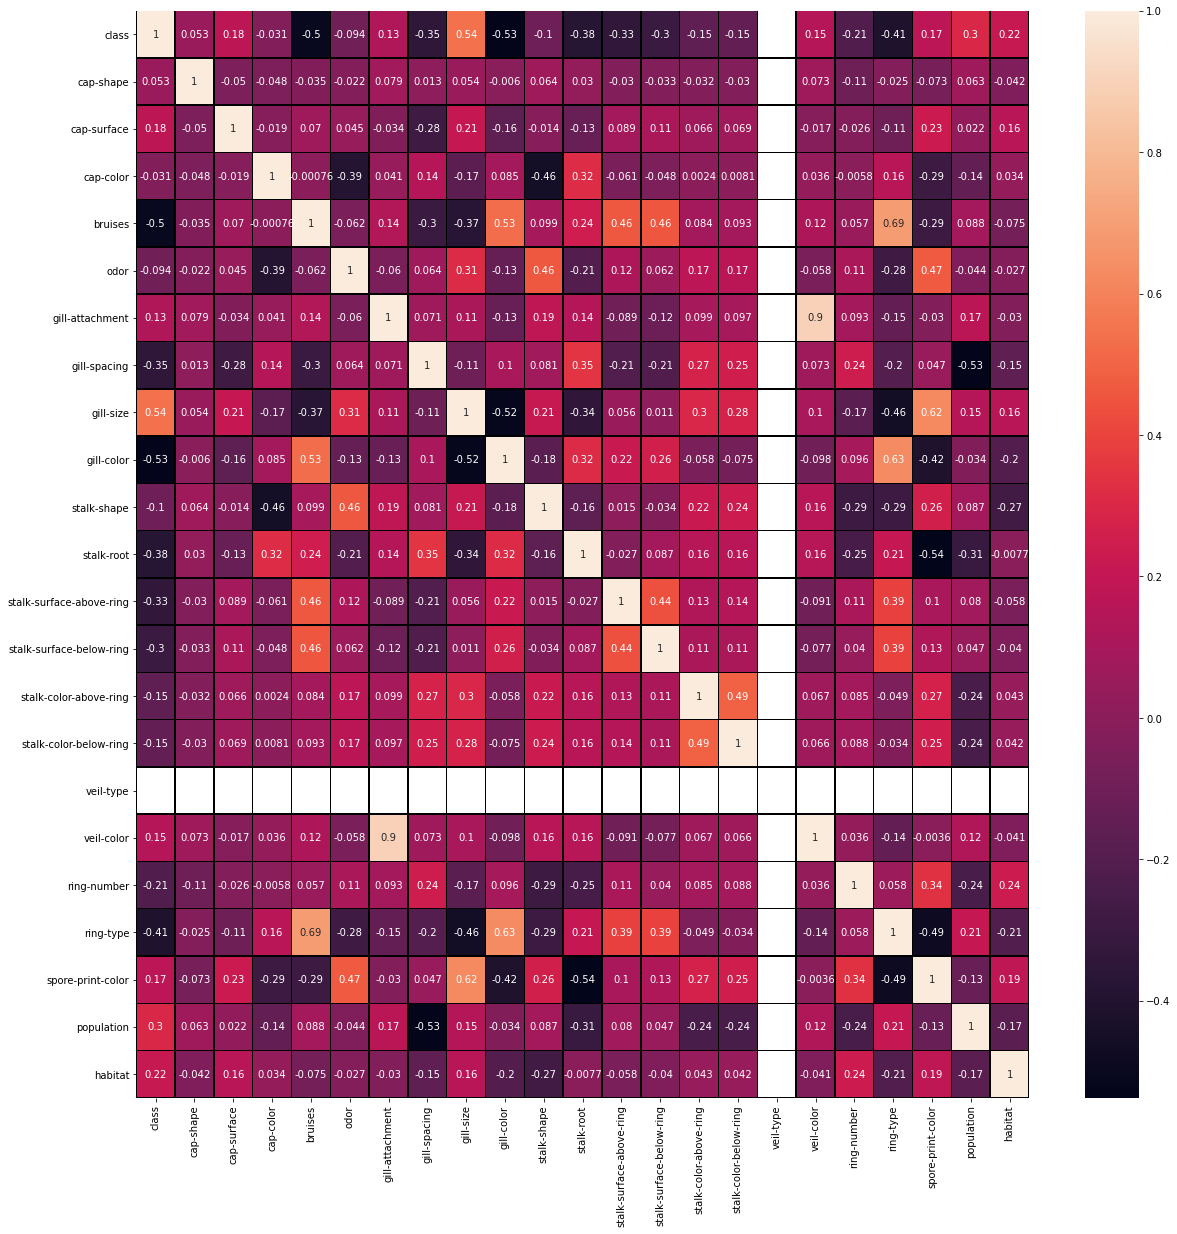

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, linewidths=0.5, linecolor='black')

In [24]:
#Looking at various factors for veil-type like distribution range, corelation it is evident that this feature has no value and can be removed.

In [25]:
df= data.drop('veil-type', axis = 1)

In [26]:
df_features=df.drop('class',axis=1)

In [27]:
#Checking outliers

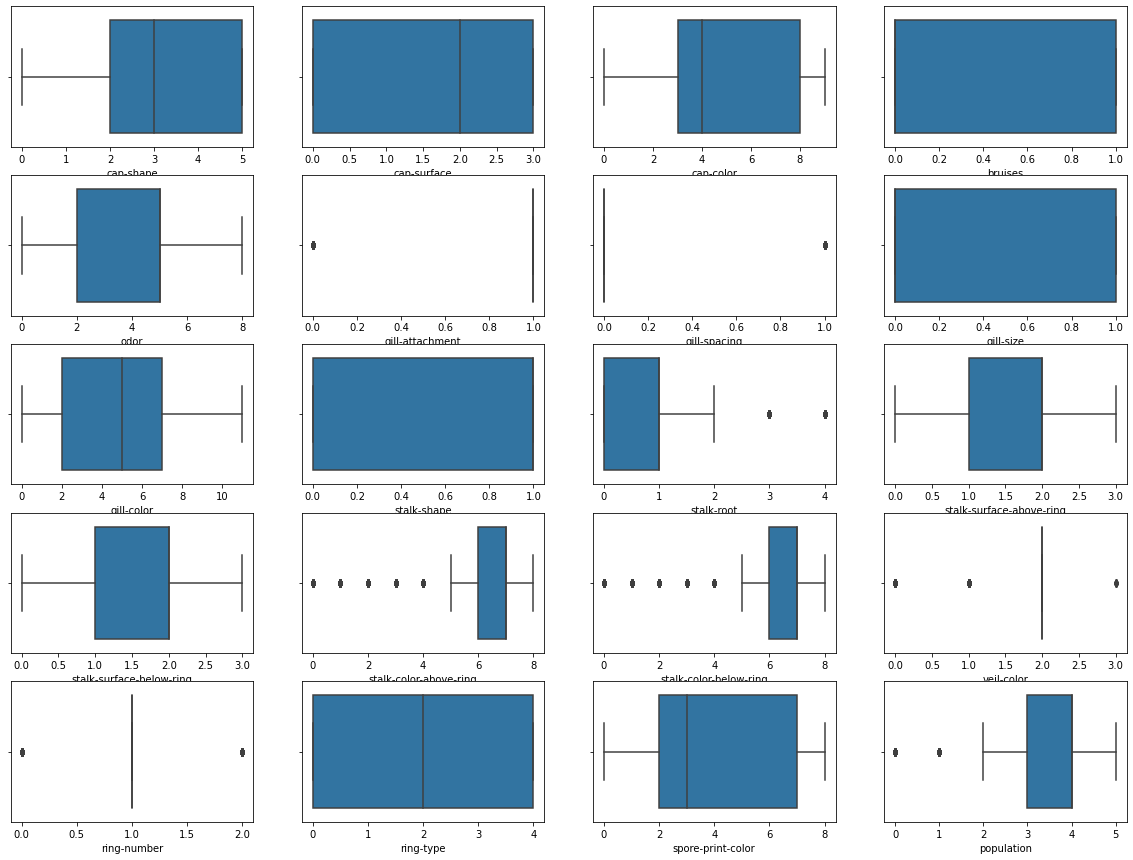

In [28]:
plt.figure(figsize=(20,15))
graph = 1

for column in df_features:
    if graph<=20:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [29]:
#Observation: Outliers are present in Population, ring-number,veil-color,stalk-color-below-ring,atalk-color-above-ring,stalk-root, gill-spacing and gill-attachment
#These outliers can be possible looking into the different range of the mushrooms.

In [30]:
x=df.drop(columns=['class']) #seperating feature and label
y=df['class']

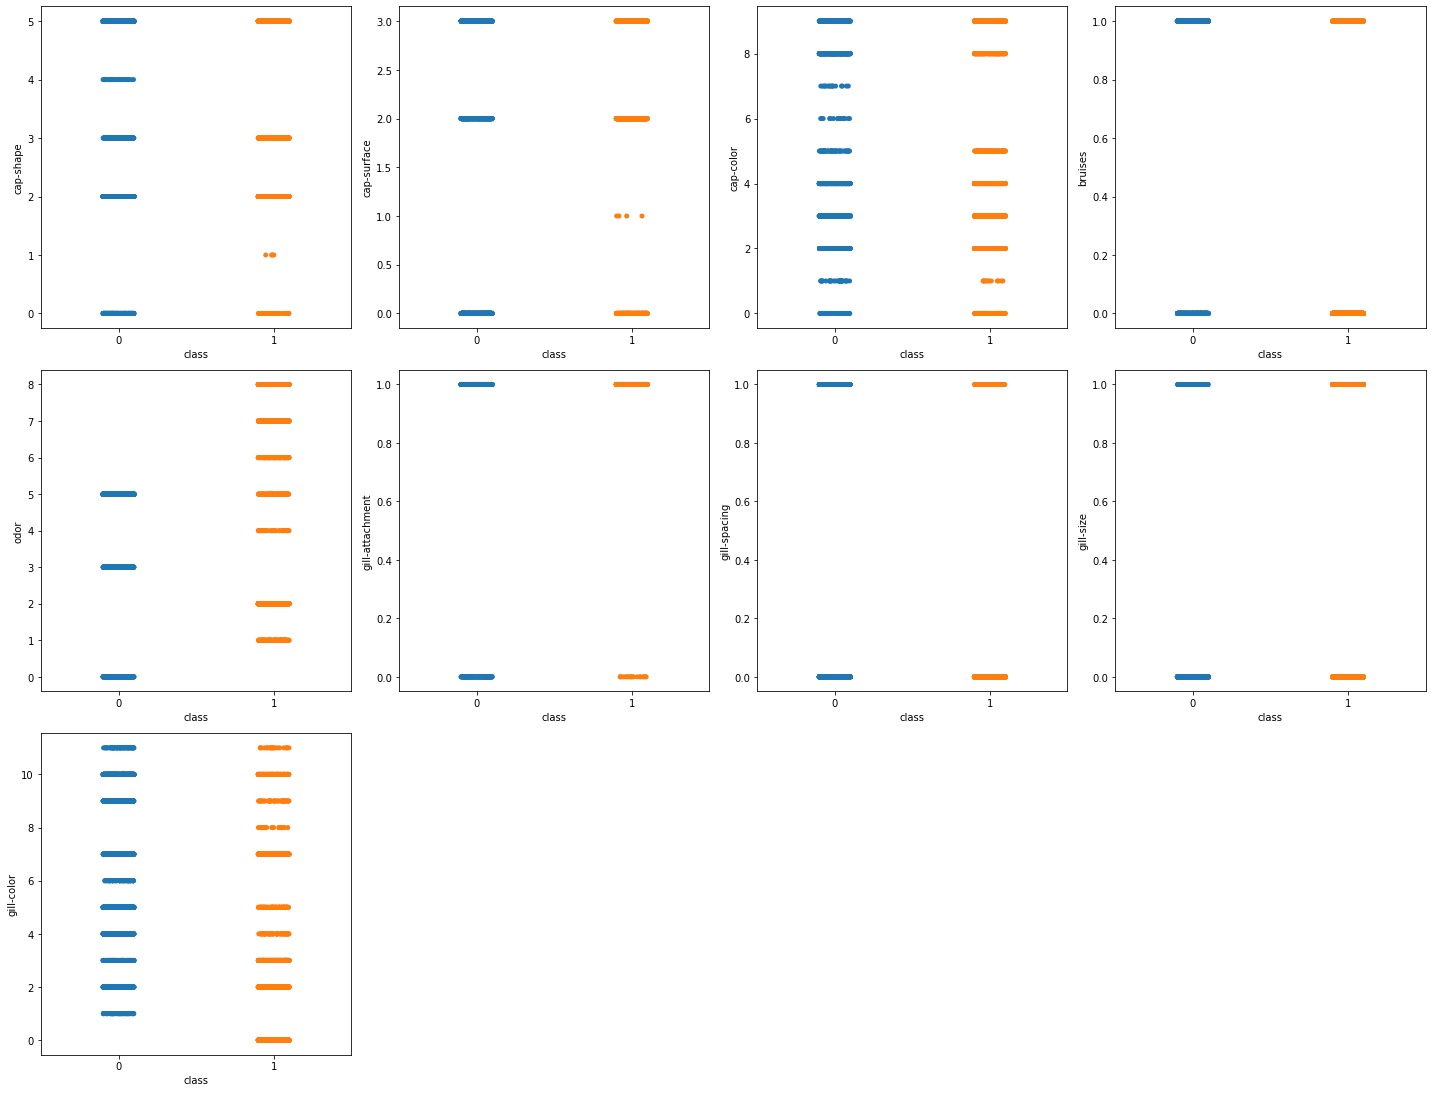

In [31]:
plt.figure(figsize=(20,30), facecolor='white') #checking the relation between feature and label
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(6,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [32]:
#Relation between each feature with label is good.

In [33]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [34]:
x_scaled.shape[1]

21

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y, test_size=0.25, random_state=355)

In [36]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred=log_reg.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9611029049729197

In [39]:
#Checking confusion matrix:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1022,   36],
       [  43,  930]], dtype=int64)

In [40]:
true_positive = conf_mat[0][0]
false_positive= conf_mat[0][1]
false_negative= conf_mat[1][1]
true_negative = conf_mat[1][0]

In [41]:
precission = true_positive/(true_positive+false_positive)
precission

0.9659735349716446

In [42]:
recall =true_positive/(true_positive+false_negative)
recall

0.5235655737704918

In [43]:
F1_Score=2*(recall*precission)/(recall+precission)
F1_Score

0.6790697674418605

In [44]:
auc=roc_auc_score(y_test,y_pred)
auc

0.9608901590582786

In [45]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [46]:
fpr

array([0.        , 0.03402647, 1.        ])

In [47]:
tpr

array([0.        , 0.95580678, 1.        ])

In [48]:
threshold

array([2, 1, 0])

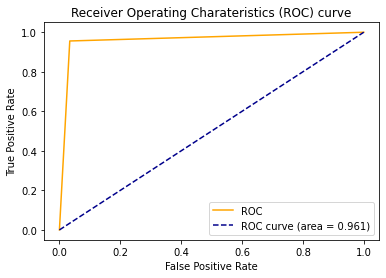

In [49]:
plt.plot(fpr, tpr, color ='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charateristics (ROC) curve')
plt.legend()
plt.show()

In [50]:
#Saving model
import pickle
filename ='Mushroom_project_model'
pickle.dump(log_reg,open(filename,'wb'))